**COMPUTER_VISION**
---
---
**PROJECT ON CONVOLUTIONAL NEURAL NETWORK :**
---
```
PREFACE:
# This project aims at Multi-Class Classification of famous dataset FashionMNIST from sklearn.datasets.

# It involves Examining multiple models , starting from Simple structure of networks ,it builds on to pattern recongnization via Computer Vision by introducing Convolutional Neural Neworks.

#This projects evolves with 3 models(Linear NN , Non-Linear NN on GPU , Convolutional NN on GPU).

#Ivolves varies Data Visualisation techniques , MOdel evaluation policies and Data Pre-processing.
```

```
Loading the Libraries:
```

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.0.1+cu118
torchvision version: 0.15.2+cu118


**Getting a dataset :**
---
---
**About Data :**
---
```
We're going to start with FashionMNIST.
MNIST stands for Modified National Institute of Standards and Technology.
```

The [original MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), made by Zalando Research, contains thousands of data points , its contains gray scale images of 10 different kinds of clothing.

![example image of FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)


```
FashionMNIST is one of those datasets, And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.

We will be building a computer vision neural network to identify the different styles of clothing in these images.

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`.
```


Importing the Data:


In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None #Not transformin the labels.
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

**Data Examining :**
---
---

```
Sample example of the Dataset:
```

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
#Printing the image shape :
image.shape

torch.Size([1, 28, 28])

The shape of the image tensor is `[1, 28, 28]`:

```
[color_channels=1, height=28, width=28]
```

Having `color_channels=1` means the image is grayscale.

In [ ]:
#Examining the number of samples in training and testing data:
print(f'Number of samples in training Data : {len(train_data.data)} ')
print(f'Number of samples in testing Data : {len(test_data.data)} ')

Number of samples in training Data : 60000 
Number of samples in testing Data : 10000 


In [ ]:
#Printing the classes present in the Data:
class_names = train_data.classes
print('List of classes_names:')
class_names

List of classes_names:


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#No. of classes in the dataset:
print(f'Number of classes in dataset is : {len(class_names)}')
class_index = train_data.class_to_idx
print(f'\nClasses with their Labels:')
class_index

Number of classes in dataset is : 10

Classes with their Labels:


{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

**Data Visualisation:**
---
---

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

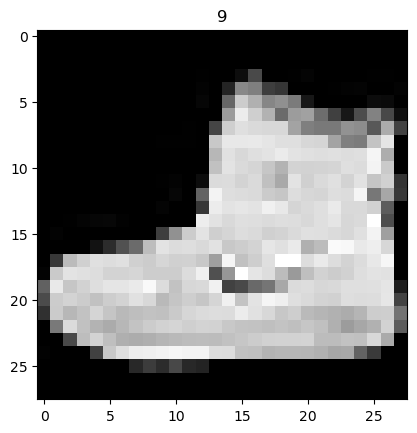

In [ ]:
import matplotlib.pyplot as plt
#First Image:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze() , cmap='gray') # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label)

```
Plotting some more Images:
```

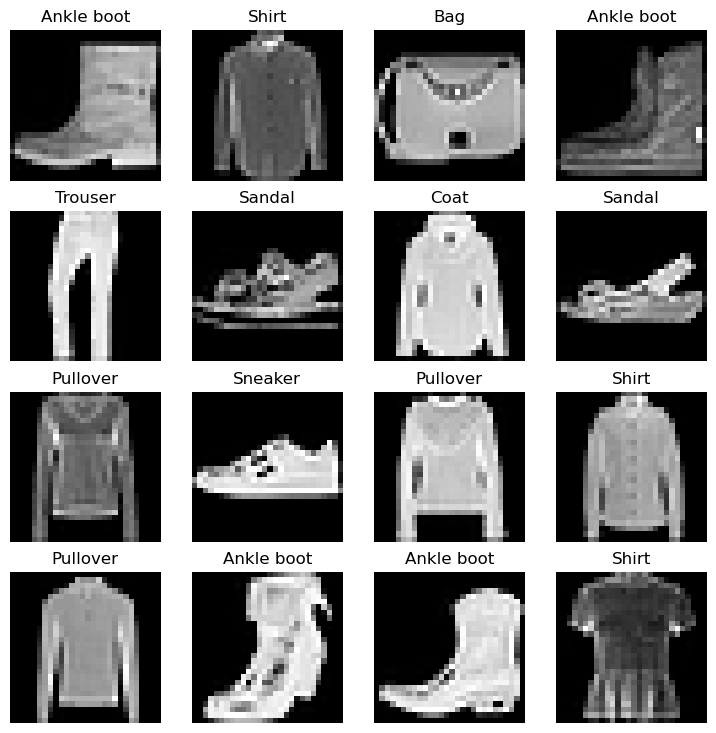

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
#Plotting sunplot():
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    #Random Index:
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    #adding subpot:
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

**Prepare DataLoader :**
---
---
The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader`.

```
It helps load data into a model.For training and for inference.It turns a large `Dataset` into a Python iterable of smaller chunks.These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

# With **mini-batches** (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch.

# Batching FashionMNIST with a batch size of 32 and shuffle turned on. Creating `DataLoader`'s for our training and test sets. ```

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter:
BATCH_SIZE = 32

# Turn datasets into iterables (batches):
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE,
    shuffle=True # shuffle data :
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

#Printing the Dataloaders:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000029DB3158CA0>, <torch.utils.data.dataloader.DataLoader object at 0x0000029DB34016A0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
# Printing training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

print(f'Shape of each batch is : {train_features_batch.shape}.')
print(f'Size of each batch is : {train_labels_batch.shape}')

Shape of each batch is : torch.Size([32, 1, 28, 28]).
Size of each batch is : torch.Size([32])


**Model 0: Build a baseline model:**
---
---

Building a **baseline model** by subclassing `nn.Module`.
A **baseline model** is one of the simplest models.
Starting with linear model and try to improve upon it with subsequent, more complicated models.

Our baseline will consist of two [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers and the [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer.

`nn.Flatten()` compresses the dimensions of a tensor into a single vector.

In [ ]:
from torch import nn
#Building the model :
#Creatinga a child class of nn.module:
class FashionMNISTModel_0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Flattening the input
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModel_0(input_shape=784, #(28*28)
    hidden_units=10,#Units in hidden Layer,
    output_shape=len(class_names)
)
model_0.to("cpu") # keep model on CPU.

FashionMNISTModel_0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### Setup loss_function , optimizer and Evaluation metric (accuracy):


In [ ]:
# Setup loss function and optimizer:
loss_fn = nn.CrossEntropyLoss() #Cross Entropy Loss:
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
#Building up a Accuracy function:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


### Creating a time calculater:
```
This will help in Examining the model's performance ad comparision of Models:
```

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### Training and Testing Loop:

```
Steps invovled :
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening.
5. Calculate the process time.
```

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs:
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches:
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss = train_loss / len(train_dataloader)

    ### Testing:
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy:
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 35.107 seconds


**Making Prediction for MOdel_0:**
---
---

In [ ]:
torch.manual_seed(42)
#Building a general funstion for model evaluation ,
#this will help in easy calling for model_evaluation:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=torch.device):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            # Make predictions with the model:
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch:
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels):

        # Scale loss and acc to find the average loss/acc per batch:
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class:
            "model_loss": loss.item(),
            "model_acc": acc}

**Model_0 evalution**
---
---

In [ ]:
# Calculate model_0 results on test dataset:
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn, device='cpu'
)
model_0_results

{'model_name': 'FashionMNISTModel_0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

```
Setting up the device agnostic code , which will hwlp in moving the models to GPU for better performance.
```

In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'device: {device}')

device: cuda


**Model_1: Building a better model with non-linearity :**
---
---
```
This model is imporvised version of Model_0,
As the Classification is complex , introducing the non-linear layers like RELU() or tanh() funtion layers is assumed to increase the Accuray of Model
```

In [ ]:
# Create a model with non-linear and linear layers
class FashionMNISTModel_1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
#Creating an INstance of the Model_1 :
model_1 = FashionMNISTModel_1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes
).to(device) # send model to GPU if it's available

print(f'Model_1 is on device : {next(model_1.parameters()).device}')

Model_1 is on device : cuda:0


### Setup loss_function , optimizer :


In [ ]:
#Loss_function:
#Crossentropy loss:
loss_fn = nn.CrossEntropyLoss()
#schtocastic gradient descent:
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### Testing and Training Loop :
```
Creating the generalised functions for training loop and testing loop.

```

In [ ]:
#Training loop function:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch.
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    #Printing out whatts happening:
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

#Testing looop function:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    #Eval mode:
    model.eval()
    # Turn on inference context manager:
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU:
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # logits -> pred labels
            )

        #Calculatig overall test_loss and test_accuracies:
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

```
Calling the MOdel_1 for training:
```

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    #calling training loop function:
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    #calling testing lop function:
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
#Printing time takem by model:
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 50.971 seconds


**Model_1 Evaluation :**
---
---

In [ ]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code
model_1_results = eval_model(model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device)
model_1_results

{'model_name': 'FashionMNISTModel_1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

```
Note:
After Intruducing the non-linearity our model_1 performing worse than model_0 probobaly due to overfitting.
 ```

**Model_2: Building a Convolutional Neural Network (CNN) :**
---
---
`# CNN's are known for their capabilities to find patterns in visual data.And since we're dealing with visual data,  CNN can improvise baseline model.`

Typical structure of a convolutional neural network:
`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`
Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.

In [ ]:
# Create a convolutional neural network
class FashionMNISTModel_2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, # default
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, #Reshaping the in_features for by formula out = (n+2s-f)/2
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModel_2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModel_2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

**Stepping through `nn.Conv2d()` :**

Newly added Layers:
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), also known as a convolutional layer.
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html), also known as a max pooling layer.

What's going on here?

Behind the scenes, our `nn.Conv2d()` is compressing the information stored in the image.

It does this by performing operations on the input (our test image) against its internal parameters.

The goal of this is similar to all of the other neural networks we've been building.

Data goes in and the layers try to update their internal parameters (patterns) to lower the loss function thanks to some help of the optimizer.

The only difference is *how* the different layers calculate their parameter updates or in PyTorch terms, the operation present in the layer `forward()` method.

Notice the change in the shapes of what's happening in and out of a `nn.MaxPool2d()` layer.

The `kernel_size` of the `nn.MaxPool2d()` layer will effects the size of the output shape.

In our case, the shape halves from a `62x62` image to `31x31` image.

```
NOTE:

This is another important piece of the puzzle of neural networks.

Essentially, **every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space**.

In other words, take a lot of numbers (raw data) and learn patterns in those numbers, patterns that are predictive whilst also being *smaller* in size than the original values.

From an artificial intelligence perspective, you could consider the whole goal of a neural network to *compress* information.

---------------------------------------
This means, that from the point of view of a neural network, intelligence is compression.

This is the idea of the use of a `nn.MaxPool2d()` layer: take the maximum value from a portion of a tensor and disregard the rest.

In essence, lowering the dimensionality of a tensor whilst still retaining a (hopefully) significant portion of the information.It is the same story for a `nn.Conv2d()` layer
```

### Setting up Loss_function and Optimizer for Model_2:

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

### Training and Testing Loop for Model_2:

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    #Training loop:
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    #Testing Loop:
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59516 | Train accuracy: 78.40%
Test loss: 0.39843 | Test accuracy: 85.86%

Epoch: 1
---------
Train loss: 0.36167 | Train accuracy: 87.01%
Test loss: 0.34359 | Test accuracy: 87.41%

Epoch: 2
---------
Train loss: 0.32252 | Train accuracy: 88.18%
Test loss: 0.32312 | Test accuracy: 88.33%

Train time on cuda: 56.796 seconds


**Model_2 Evaluation :**
---
---

In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTModel_2',
 'model_loss': 0.32311874628067017,
 'model_acc': 88.32867412140575}

**Comparision of Models :**
---
---

We've trained three different models.

1. `model_0` - our baseline model with two `nn.Linear()` layers.
2. `model_1` - the same setup as our baseline model except with `nn.ReLU()` layers in between the `nn.Linear()` layers.
3. `model_2` - with 2 block on convulutional neural layers.


In [ ]:
#Combing the results of the 3 models :

import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel_0,0.476639,83.426518
1,FashionMNISTModel_1,0.685001,75.019968
2,FashionMNISTModel_2,0.323119,88.328674


In [ ]:
#Comparing thier training times:

# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results


,model_name,model_loss,model_acc,training_time
0,FashionMNISTModel_0,0.476639,83.426518,35.106502
1,FashionMNISTModel_1,0.685001,75.019968,50.970534
2,FashionMNISTModel_2,0.323119,88.328674,56.796329


Text(0, 0.5, 'model')

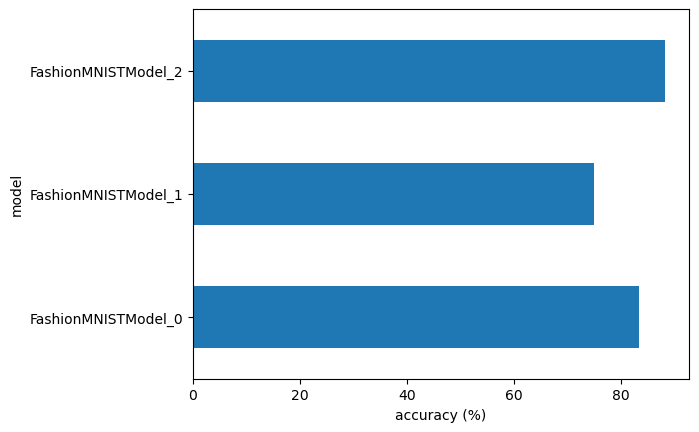

In [ ]:
# Visualize our model results:

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model:

let's create a function `make_predictions()` where we can pass the model and some data for it to predict on.

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[9.5400e-09, 1.0797e-08, 3.6269e-09, 1.3002e-08, 1.4412e-09, 9.9996e-01,
         5.4165e-08, 1.1536e-06, 1.9064e-06, 3.7223e-05],
        [5.7968e-02, 7.8470e-01, 6.5762e-04, 1.2483e-01, 1.9787e-02, 3.6723e-05,
         1.1176e-02, 8.3944e-05, 7.2258e-04, 4.4313e-05]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

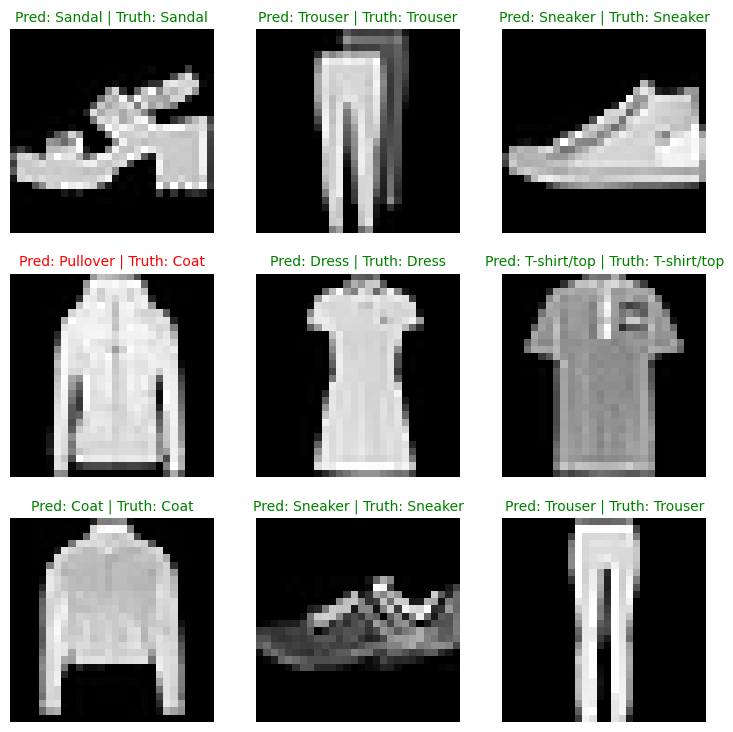

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False)

**Conclusion :**
---
---

It looks like our CNN (`FashionMNISTModel_2`) model performed the best (lowest loss, highest accuracy) but had the longest training time.

And our baseline model (`FashionMNISTModel_0`) performed better than `model_1` (`FashionMNISTModel_1`) due to issue of Overfitting in model_1.

### Performance-speed tradeoff :
Generally, you get better performance out of a larger, more complex model (like we did with `model_2`).

However, this performance increase often comes at a sacrifice of training speed and inference speed.

```
{'model_name': 'FashionMNISTModel_0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

 {'model_name': 'FashionMNISTModel_1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

 {'model_name': 'FashionMNISTModel_2',
 'model_loss': 0.3280191421508789,
 'model_acc': 87.90934504792332} ```